# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Laura Sofía Sierra Sánchez
*Métodos computacionales 2025-I*

---

In [6]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt

# 1.

<center>

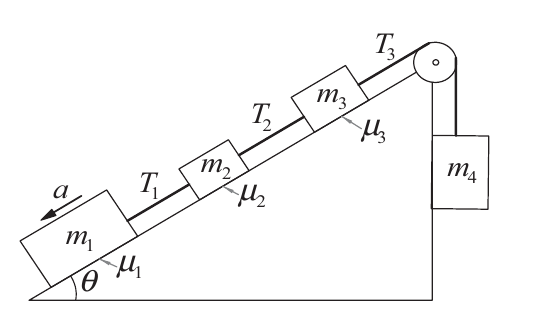

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta) 
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta) 
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta) 
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [7]:
# Datos del problema
m = np.array([10, 4, 5, 6])  # masas (kg)
mu = np.array([0.25, 0.3, 0.2])  # coeficientes de fricción
theta = np.radians(45)  # ángulo de inclinación (radianes)
g = 9.81  # aceleración gravitatoria (m/s^2)

# Matriz de coeficientes
A = np.array([
    [1, 0, 0, m[0]],      # Ecuación para m1
    [-1, 1, 0, m[1]],     # Ecuación para m2
    [0, -1, 1, m[2]],     # Ecuación para m3
    [0, 0, -1, m[3]]])    # Ecuación para m4

# Construir el vector de términos independientes b
sin_theta = np.sin(theta)
cos_theta = np.cos(theta)

b = np.array([
    m[0] * g * (sin_theta - mu[0] * cos_theta),  # m1
    m[1] * g * (sin_theta - mu[1] * cos_theta),  # m2
    m[2] * g * (sin_theta - mu[2] * cos_theta),  # m3
    -m[3] * g                                    # m4
])

# Resolver el sistema de ecuaciones lineales
x = np.linalg.solve(A, b)

# Resultados
T1, T2, T3, a = x

print(f"Aceleración del sistema (a): {a:.4f} m/s^2")
print(f"Tensión en la cuerda 1 (T1): {T1:.4f} N")
print(f"Tensión en la cuerda 2 (T2): {T2:.4f} N")
print(f"Tensión en la cuerda 3 (T3): {T3:.4f} N")

Aceleración del sistema (a): 1.6134 m/s^2
Tensión en la cuerda 1 (T1): 35.8914 N
Tensión en la cuerda 2 (T2): 48.8606 N
Tensión en la cuerda 3 (T3): 68.5404 N


# 2. 
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

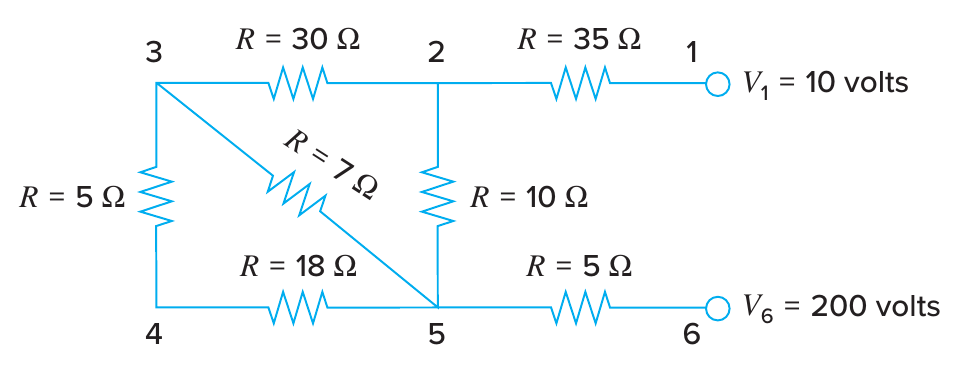


In [8]:
# Voltajes (voltios)
V1 = 10.0 
V6 = 200.0

# Resistencias (ohms)
R12 = 35.0
R23 = 30.0
R34 = 5.0
R45 = 18.0
R56 = 5.0
R25 = 10.0
R35 = 7.0

# Hallar voltajes en cada nodo: V2, V3, V4, V5
# Construir matriz G y el vector b para los nodos [2,3,4,5]

G = np.zeros((4,4), dtype=float) # Relaciona los voltajes de los nodos con las resistencias
b = np.zeros(4, dtype=float)

# Nodo 2 [0]: conexiones con 1,3,5
G[0,0] = 1/R12 + 1/R23 + 1/R25
G[0,1] = -1/R23
G[0,3] = -1/R25    
b[0]    = (1/R12) * V1

# Nodo 3 [1]: conexiones con 2,4,5
G[1,1] = 1/R23 + 1/R34 + 1/R35
G[1,0] = -1/R23
G[1,2] = -1/R34     
G[1,3] = -1/R35    

# Node 4 [2]: conexiones con 3,5
G[2,2] = 1/R34 + 1/R45
G[2,1] = -1/R34   
G[2,3] = -1/R45     

# Node 5 [3]: conexiones con 4,2,3,6
G[3,3] = 1/R45 + 1/R25 + 1/R35 + 1/R56
G[3,0] = -1/R25  
G[3,1] = -1/R35    
G[3,2] = -1/R45     
b[3]    = (1/R56) * V6

# Resolver para V2, V3, V4, V5
V_unknown = np.linalg.solve(G, b)
V2, V3, V4, V5 = V_unknown

# Calcular corrientes
# i_ab = (Va - Vb)/R_ab
i_12 = (V1 - V2) / R12
i_23 = (V2 - V3) / R23
i_34 = (V3 - V4) / R34
i_45 = (V4 - V5) / R45
i_56 = (V5 - V6) / R56
i_25 = (V2 - V5) / R25
i_35 = (V3 - V5) / R35

# Resultados
print("Voltajes en los nodos calculados:")
print(f"V2 = {V2:.4f} V")
print(f"V3 = {V3:.4f} V")
print(f"V4 = {V4:.4f} V")
print(f"V5 = {V5:.4f} V\n")

print("Corrientes que circulan por cada nodo:")
print(f"i_12 (1 -> 2) = {i_12:.4f} A")
print(f"i_23 (2 -> 3) = {i_23:.4f} A")
print(f"i_34 (3 -> 4) = {i_34:.4f} A")
print(f"i_45 (4 -> 5) = {i_45:.4f} A")
print(f"i_56 (5 -> 6) = {i_56:.4f} A")
print(f"i_25 (2 -> 5) = {i_25:.4f} A")
print(f"i_35 (3 -> 5) = {i_35:.4f} A\n")

Voltajes en los nodos calculados:
V2 = 149.1337 V
V3 = 175.4212 V
V4 = 176.4435 V
V5 = 180.1238 V

Corrientes que circulan por cada nodo:
i_12 (1 -> 2) = -3.9752 A
i_23 (2 -> 3) = -0.8762 A
i_34 (3 -> 4) = -0.2045 A
i_45 (4 -> 5) = -0.2045 A
i_56 (5 -> 6) = -3.9752 A
i_25 (2 -> 5) = -3.0990 A
i_35 (3 -> 5) = -0.6718 A



# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), 
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

Matriz A:
 [[ 2. -1.  1.]
 [ 0.  3. -1.]
 [ 2.  1.  3.]]
Matriz diagonal D:
 [[4.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 2.+1.68652966e-08j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 2.-1.68652966e-08j]] 

Ejemplo de r(t) en t=0.5:
[ 7.00616141-1.84991270e-09j -1.56959775+9.36521403e-09j
 15.16100689-1.21471693e-08j] 



/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


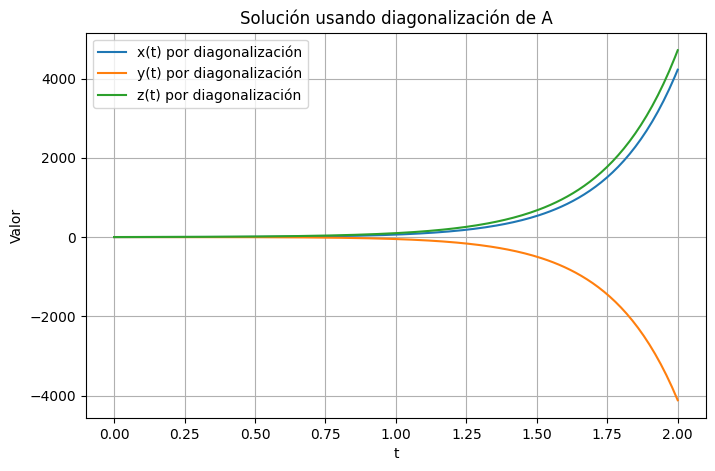

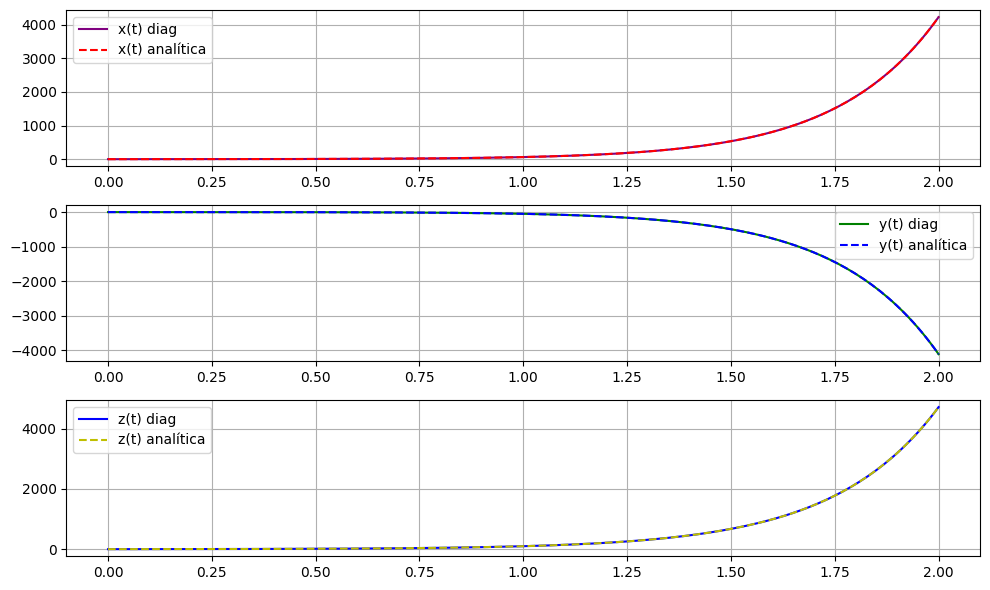

4) Error máximo entre ambas soluciones (x, y, z): [2.20782547e-07 2.53407886e-07 2.39045447e-07]


In [9]:
# Matriz A
A = np.array([[2, -1,  1],
              [0,  3, -1],
              [2,  1,  3]], dtype=float)

# Autovalores y autovectores
eigvals, eigvecs = np.linalg.eig(A)
U = eigvecs
D = np.diag(eigvals)
U_inv = np.linalg.inv(U)

print("Matriz A:\n", A)
print("Matriz diagonal D:\n", np.real_if_close(D), "\n")

# Usar f(A) = U f(D) U^{-1} para encontrar x(t), y(t), z(t)
# Condición inicial
r0 = np.array([1, 1, 2], dtype=float)

# Función para calcular r(t) = exp(A t) r0 usando diagonalización
def r_t(t):
    expD = np.diag(np.exp(eigvals * t))  # e^(D t)
    rt_val = U @ expD @ U_inv @ r0
    return np.real_if_close(rt_val, tol=1e-12) # Eliminar partes imaginarias

# Intervalo de tiempo
t_vals = np.linspace(0, 2, 200)
sol_diag = np.array([r_t(t) for t in t_vals])
sol_diag = np.real_if_close(sol_diag, tol=1e-12)  # Asegurar que es real

x_vals, y_vals, z_vals = sol_diag[:,0], sol_diag[:,1], sol_diag[:,2]

print("Ejemplo de r(t) en t=0.5:")
print(r_t(0.5), "\n")

# Graficar x(t), y(t), z(t)
plt.figure(figsize=(8,5))
plt.plot(t_vals, x_vals, label='x(t) por diagonalización')
plt.plot(t_vals, y_vals, label='y(t) por diagonalización')
plt.plot(t_vals, z_vals, label='z(t) por diagonalización')
plt.xlabel('t')
plt.ylabel('Valor')
plt.title('Solución usando diagonalización de A')
plt.legend()
plt.grid()
plt.show()

# Comparar con la solución analítica
x0, y0, z0 = r0

# Ecuaciones analíticas
def sol_analitica(t):
    e2t = np.exp(2*t)
    term = e2t
    x = 0.5 * (x0*(term*(1+term-2*t)) + y0*(-2*t*term) + z0*(term*(-1+term)))
    y = 0.5 * (x0*(-term*(-1+term-2*t)) + y0*(2*(t+1)*term) + z0*(-term*(-1+term)))
    z = 0.5 * (x0*(term*(-1+term+2*t)) + y0*(2*t*term) + z0*(term*(1+term)))
    return np.real_if_close([x, y, z], tol=1e-12)

sol_an = np.array([sol_analitica(t) for t in t_vals])
sol_an = np.real_if_close(sol_an, tol=1e-12)  # Asegurar que sea real

# Graficar comparación
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t_vals, x_vals, color='purple', label='x(t) diag')
plt.plot(t_vals, sol_an[:,0], 'r--', label='x(t) analítica')
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(t_vals, y_vals, 'g', label='y(t) diag')
plt.plot(t_vals, sol_an[:,1], 'b--', label='y(t) analítica')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(t_vals, z_vals, 'b', label='z(t) diag')
plt.plot(t_vals, sol_an[:,2], 'y--', label='z(t) analítica')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Errores máximos
error_max = np.max(np.abs(sol_diag - sol_an), axis=0)
print("4) Error máximo entre ambas soluciones (x, y, z):", error_max)


# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix} 
B_z & B_x - iB_y \\ 
B_x + iB_y & -B_z 
\end{pmatrix} 
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [10]:
# Parámetros
gamma = 2   
hbar = 1      
B = np.array([0, 0, 1])  # Campo magnético (Bx, By, Bz)

# Construcción del Hamiltoniano
Bx, By, Bz = B
H = -(gamma * hbar / 2) * np.array([
    [Bz, Bx - 1j * By],
    [Bx + 1j * By, -Bz]
], dtype=complex)

# Verificar que H es hermítica
es_hermitica = np.allclose(H, H.conj().T)
print("¿H es hermítica?:", es_hermitica)

# Niveles de energía permitidos (autovalores)
autovalores, autovectores = np.linalg.eig(H)
print("\nNiveles de energía permitidos:", autovalores)

# Autovectores normalizados
print("\nAutovectores normalizados:")
for i, vec in enumerate(autovectores.T):
    norm = np.linalg.norm(vec)
    vec_normalizado = vec / norm
    print(f"- Autovector {i+1}: {vec_normalizado}")
    print(f"- Norma: {np.linalg.norm(vec_normalizado)}")


¿H es hermítica?: True

Niveles de energía permitidos: [-1.+0.j  1.-0.j]

Autovectores normalizados:
- Autovector 1: [1.+0.j 0.+0.j]
- Norma: 1.0
- Autovector 2: [0.+0.j 1.+0.j]
- Norma: 1.0


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura. 

<center>

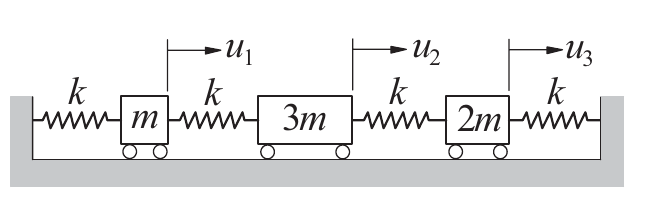
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1 
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2 
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [11]:
# Parámetros simbólicos (k/m factor común)
# Matriz de rigidez K (en unidades de k)
K = np.array([
    [ 2, -1,  0],
    [-1,  2, -1],
    [ 0, -1,  2]
], dtype=float)

# Matriz de masa M (en unidades de m)
M = np.array([
    [1, 0, 0],
    [0, 3, 0],
    [0, 0, 2]
], dtype=float)

# Resolver el problema generalizado
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)

# Ordenar por frecuencia creciente
idx = np.argsort(eigvals)
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Frecuencias naturales (en términos de sqrt(k/m))
omega = np.sqrt(eigvals) 

print("Frecuencias naturales (ω) en unidades de sqrt(k/m):")
for i, w in enumerate(omega, start=1):
    print(f"Modo {i}: ω = {w:.4f} * sqrt(k/m)")

print("\nFormas modales (normalizadas al primer componente):")
for i in range(eigvecs.shape[1]):
    mode_shape = eigvecs[:, i] / eigvecs[0, i]  # normalizar primer componente a 1
    print(f"Modo {i+1}: {mode_shape}")

Frecuencias naturales (ω) en unidades de sqrt(k/m):
Modo 1: ω = 0.5028 * sqrt(k/m)
Modo 2: ω = 1.0867 * sqrt(k/m)
Modo 3: ω = 1.4943 * sqrt(k/m)

Formas modales (normalizadas al primer componente):
Modo 1: [1.         1.7471785  1.16918414]
Modo 2: [ 1.          0.81907947 -2.26364435]
Modo 3: [ 1.         -0.23292464  0.09446021]
